# Package

In [ ]:
pip install datetime

# Data pipline from Yahoo Finance

In [ ]:
import yfinance as yf
from datetime import datetime, timedelta

# Define the ticker symbols for NICE and its competitors
tickers = ["NICE", "FIVN", "RNG", "CRM", "EGHT","MNDY","FROG","CLBT"]

# Initialize a dictionary to store the financial data
financials_data = {}
# Calculate the date 30 days ago from today
end_date = datetime.now()
start_date = end_date - timedelta(days=30)

# Fetch the financial data for each company
for ticker in tickers:
    # Get the company's data from yfinance
    company = yf.Ticker(ticker)

    # Fetch financial data
    fin_data = company.financials
    bal_sheet = company.balance_sheet

    # Fetch company info for share price and shares outstanding
    info = company.info
    share_price = info.get('currentPrice')
    shares_outstanding = info.get('sharesOutstanding')

    # Fetch necessary items from financial data
    revenue = fin_data.loc['Total Revenue'][0] if 'Total Revenue' in fin_data.index else None
    net_income = fin_data.loc['Net Income'][0] if 'Net Income' in fin_data.index else None
    ebit = fin_data.loc['EBIT'][0] if 'EBIT' in fin_data.index else None
    reconciled_depreciation = fin_data.loc['Reconciled Depreciation'][0] if 'Reconciled Depreciation' in fin_data.index else None

    # Calculate EBITDA if not directly available
    ebitda = ebit + reconciled_depreciation if ebit is not None and reconciled_depreciation is not None else None

    # Fetch necessary items from balance sheet
    total_debt = bal_sheet.loc['Total Debt'][0] if 'Total Debt' in bal_sheet.index else None
    cash_and_short_term_investments = bal_sheet.loc['Cash Cash Equivalents And Short Term Investments'][0] if 'Cash Cash Equivalents And Short Term Investments' in bal_sheet.index else None

    # Calculate net debt
    net_debt = total_debt - cash_and_short_term_investments if total_debt is not None and cash_and_short_term_investments is not None else None

    # Calculate enterprise value
    enterprise_value = info['marketCap'] + net_debt if net_debt is not None else None

    # Fetch necessary items from financial data
    total_operating_expenses = fin_data.loc['Operating expenses'][0] if 'Operating expenses' in fin_data.index else None

    # Calculate EBIT as revenue minus operating expenses
    operating_income = fin_data.loc['Operating Income'][0] if 'Operating Income' in fin_data.index else None

    # Operating Income is used as a proxy for EBIT
    ebit = operating_income

    # Selling General Administrative
    sg_and_a = fin_data.loc['Selling General Administrative'][0] if 'Selling General Administrative' in fin_data.index else None

    # Fetch historical market data
    hist = company.history(start=start_date.strftime('%Y-%m-%d'), end=end_date.strftime('%Y-%m-%d'))

    # Calculate the 30-day average closing price
    avg_price_30d = hist['Close'].mean()

    income_statement = company.financials.T
    if len(income_statement.index) >= 2:  # Check if at least two years of data are available
        # Calculate year-over-year growth rates
        revenue_growth = ((income_statement['Total Revenue'].iloc[0] - income_statement['Total Revenue'].iloc[1]) /
                          income_statement['Total Revenue'].iloc[1]) * 100

    # Store the data
    financials_data[ticker] = {
        'Share Price': share_price,
        '30d Average Price': avg_price_30d,
        'Shares Outstanding': shares_outstanding,
        'Selling General Administrative': sg_and_a,
        'Revenue Growth (%)': revenue_growth,
        'Revenue': revenue,
        'EBITDA': ebitda,
        'EBIT': ebit,
        'Net Income': net_income,
        'Total Debt': total_debt,
        'Cash and Short Term Investments': cash_and_short_term_investments,
        'Net Debt': net_debt,
        'Enterprise Value': enterprise_value
    }

# Display the financial data
for ticker, data in financials_data.items():
    print(f"{ticker}: {data}")


NICE: {'Share Price': 231.57, '30d Average Price': 248.60399856567383, 'Shares Outstanding': 63058700, 'Selling General Administrative': None, 'Revenue Growth (%)': 8.995302788161522, 'Revenue': 2377508000.0, 'EBITDA': 628761000.0, 'EBIT': 435227000.0, 'Net Income': 338301000.0, 'Total Debt': 782966000.0, 'Cash and Short Term Investments': 1407839000.0, 'Net Debt': -624873000.0, 'Enterprise Value': 13981637080.0}
FIVN: {'Share Price': 56.81, '30d Average Price': 60.994500160217285, 'Shares Outstanding': 73844896, 'Selling General Administrative': None, 'Revenue Growth (%)': 16.902186054752804, 'Revenue': 910488000.0, 'EBITDA': -10620000.0, 'EBIT': -98576000.0, 'Net Income': -81764000.0, 'Total Debt': 793878000.0, 'Cash and Short Term Investments': 730297000.0, 'Net Debt': 63581000.0, 'Enterprise Value': 4258709576.0}
RNG: {'Share Price': 30.71, '30d Average Price': 33.8165002822876, 'Shares Outstanding': 82393000, 'Selling General Administrative': None, 'Revenue Growth (%)': 10.7677799

# Other Plot

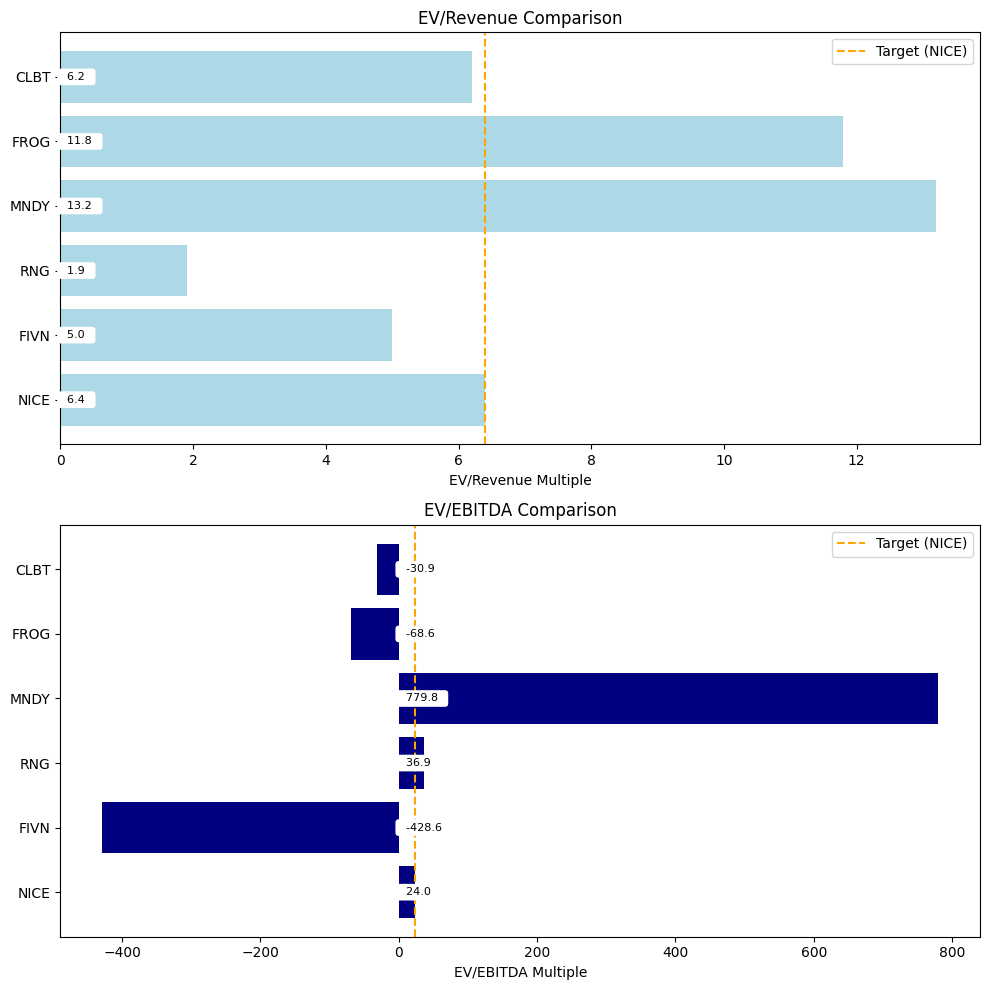

In [ ]:
import matplotlib.pyplot as plt

# Data from the provided information
companies = ['NICE', 'FIVN', 'RNG', 'MNDY', 'FROG', 'CLBT']
ev_revenue = [6.4, 5.0, 1.9, 13.2, 11.8, 6.2]
ev_ebitda = [24.0, -428.6, 36.9, 779.8, -68.6, -30.9]
target_ev_revenue = 6.4
target_ev_ebitda = 24

# Create subplots
fig, ax = plt.subplots(2, 1, figsize=(10, 10))

# Plot EV/Revenue
ax[0].barh(companies, ev_revenue, color='lightblue')
ax[0].set_title('EV/Revenue Comparison')
ax[0].axvline(x=target_ev_revenue, color='orange', linestyle='--', label='Target (NICE)')
ax[0].set_xlabel('EV/Revenue Multiple')
ax[0].legend()

# Plot EV/EBITDA
ax[1].barh(companies, ev_ebitda, color='navy')
ax[1].set_title('EV/EBITDA Comparison')
ax[1].axvline(x=target_ev_ebitda, color='orange', linestyle='--', label='Target (NICE)')
ax[1].set_xlabel('EV/EBITDA Multiple')
ax[1].legend()


# Add annotations with the exact values next to the bars with a background highlight
for i in range(len(companies)):
    ax[0].text(0, i, f'  {ev_revenue[i]}  ', va='center', ha='left', color='black', fontsize=8,
               bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))
    ax[1].text(0, i, f'  {ev_ebitda[i]}  ', va='center', ha='left', color='black', fontsize=8,
               bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.3'))

# Adjust layout
plt.tight_layout()
plt.show()


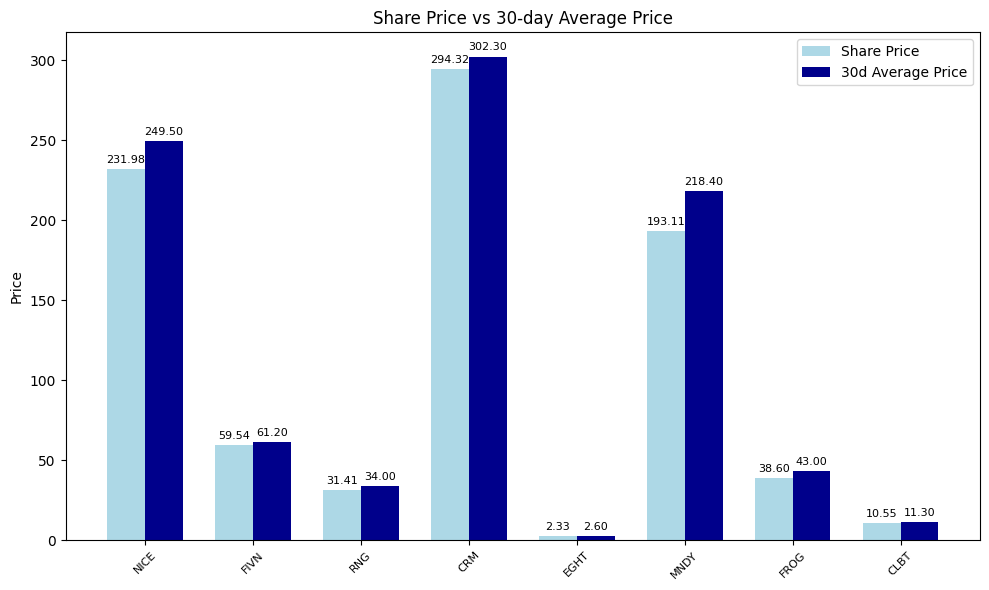

In [ ]:
import matplotlib.pyplot as plt

data = {
    'NICE': {'Share Price': 231.98, '30d Average Price': 249.5},
    'FIVN': {'Share Price': 59.54, '30d Average Price': 61.2},
    'RNG': {'Share Price': 31.41, '30d Average Price': 34.0},
    'CRM': {'Share Price': 294.32, '30d Average Price': 302.3},
    'EGHT': {'Share Price': 2.33, '30d Average Price': 2.60},
    'MNDY': {'Share Price': 193.11, '30d Average Price': 218.4},
    'FROG': {'Share Price': 38.6, '30d Average Price': 43.0},
    'CLBT': {'Share Price': 10.55, '30d Average Price': 11.3}
}
companies = list(data.keys())
share_prices = [info['Share Price'] for info in data.values()]
average_prices = [info['30d Average Price'] for info in data.values()]

# Create the bar plot
x = range(len(companies))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))  # larger figure size
rects1 = ax.bar(x, share_prices, width, label='Share Price', color='lightblue')
rects2 = ax.bar([p + width for p in x], average_prices, width, label='30d Average Price', color='darkblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Price', fontsize=10)
ax.set_title('Share Price vs 30-day Average Price', fontsize=12)
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(companies, fontsize=8)
ax.legend(fontsize=10)

# Function to add labels on the bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

# Plot
autolabel(rects1)
autolabel(rects2)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

